# Pixel histograms

In this tutorial we are going to plot a histogram to explore the pixel intensity values of an image.

Let's begin by loading in many of the packages we have already worked with in this class. 

Specifically, `rasterio`, `numpy` and `matplotlib`.


In [1]:
# Example
%matplotlib inline
import rasterio
import numpy
from matplotlib import pyplot as plt

For the sake of consistency, let's continue working on the the Shenandoah River image, from the Shenandoah Valley, which we explored in the previous tutorial. 


In [2]:
# Example
# Our single 4 band (blue, green, red, NIR) PlanetScope image.
image_file = "shenandoah_valley.tif"

# Let's get our rasterio object:
my_image = rasterio.open(image_file)
my_image

<open DatasetReader name='shenandoah_valley.tif' mode='r'>

Now we have our image, we can parse out our four bands into individual variable names for blue, green, red and near-infrared.

In [3]:
# Example
# The PlanetScope band order is BGRN.
blue, green, red, nir = my_image.read()
blue

array([[3907, 3902, 3884, ..., 3928, 3922, 3856],
       [3836, 3859, 3898, ..., 3917, 3888, 3867],
       [3773, 3853, 3925, ..., 3916, 3892, 3864],
       ...,
       [3920, 3940, 3991, ..., 3750, 3800, 3808],
       [3900, 3956, 3990, ..., 3774, 3786, 3771],
       [3910, 3953, 3949, ..., 3786, 3760, 3755]], dtype=uint16)

Plotting in `matplotlib` takes a bit of effort, but is no different from any script-based plotting package.

The benefit is that once you've written the code, it's very easy to rerun with new data (as opposed to needing to manually reproduce the graphic).

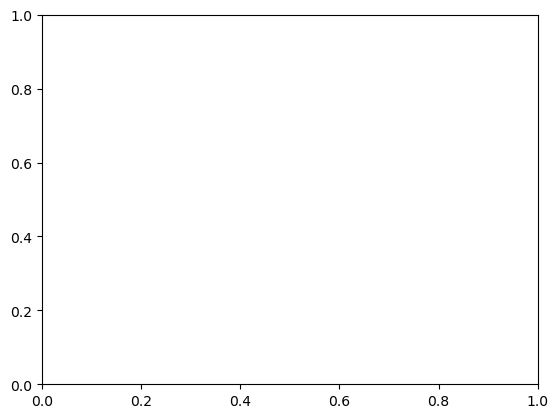

In [4]:
# Example
# Let's define a new figure
# The (1, 1) means we want one colum and one row, for a single plot (as opposed to a panel plot).
fig, ax1 = plt.subplots(1,1) 

## Quick Task:

Explore the implications of changing the subplot axes values to see how these parameters changes the plot format.


### A Single Histogram 

Now we can begin plotting. 

Below we are going to obtain those values in the blue band layer which are not null. 

Null data values are those with no data. 

You need to be aware of these null values, and ideally control for them.

In [5]:
# Example
# let's plot non-null blue band values as an example
# For the x-axis, we want to count every pixel that has a value
x = blue[numpy.not_equal(blue, my_image.nodata)]
x

array([3907, 3902, 3884, ..., 3786, 3760, 3755], dtype=uint16)

Now we can plot this data. 

See the way we create a single plot below for the frequency of blue values.

First the `plt.subplots()` function is specified to set up figure and axis objects.

Then we add our data to the axis using `ax.hist()`.

We can also add a title to the plot using `ax.set_title()`.

Text(0.5, 1.0, 'Histogram of Blue Values')

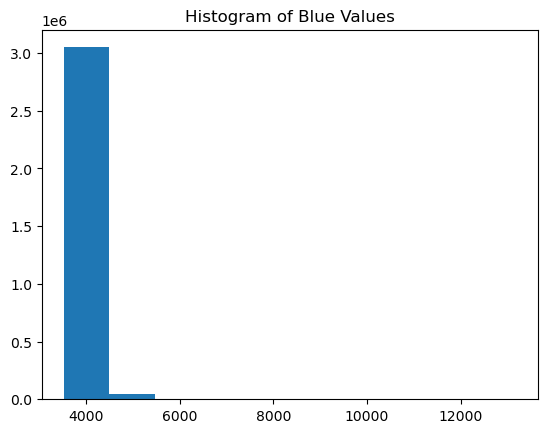

In [6]:
# Example
# Create just a figure and only one subplot
fig, ax = plt.subplots(1,1)
ax.hist(x)

# We can state the title for this plot too
ax.set_title('Histogram of Blue Values')

## A Two-Plot Panel Plot

Single plots are useful, but often we will want to be able to compared histograms against one another.

Thus, panel plots are a very nice tool for this purpose. 

Let's examine creating a panel plot below for both blue and red bands:

Text(0.5, 1.0, 'Histogram of Red Values')

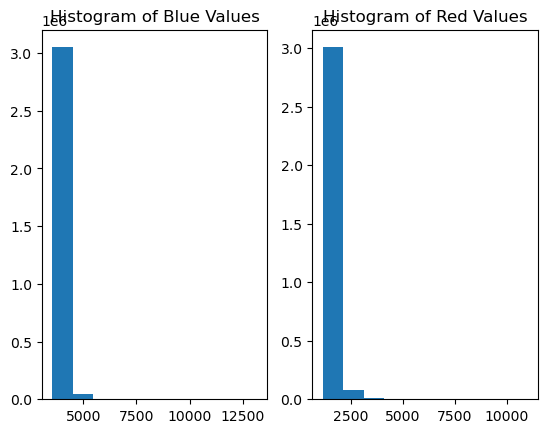

In [7]:
# Example
# Create two subplots and unpack the output array immediately
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(blue[numpy.not_equal(blue, my_image.nodata)])
ax2.hist(red[numpy.not_equal(red, my_image.nodata)])

# We can state the title for these plots too
ax1.set_title('Histogram of Blue Values')
ax2.set_title('Histogram of Red Values')

While this looks nice, it would be more helpful to also have this suitably colored.

Let's just use colors which match the bands for now. 

But be aware of more examples of `matplotlib` colors here:

https://matplotlib.org/2.0.0/examples/color/named_colors.html 



Text(0.5, 1.0, 'Red Histogram')

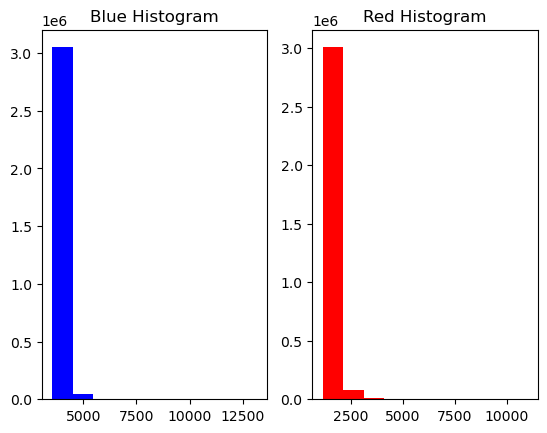

In [8]:
# Example
# Create two subplots and unpack the output array immediately
fig, (ax1, ax2) = plt.subplots(1, 2)

# Let's get our data
blue_data = blue[numpy.not_equal(blue, my_image.nodata)]
red_data = red[numpy.not_equal(red, my_image.nodata)]

# Specify the .hist() function to create the hist
ax1.hist(blue_data, color='blue')
ax2.hist(red_data, color='red')

# Now add plot titles 
ax1.set_title('Blue Histogram')
ax2.set_title('Red Histogram')

You just need to be aware when selecting colors for your histogram plots, that some people are colorblind.

There are even packages which have pre-existing color sequences which are colorblind-friendly:
    
https://github.com/sjmgarnier/viridis
    
Also, be aware many academic journals may still print in black and white for the physical copies sent out to subscribers!

This means, you may need to select color combinations which still differentiate when converted to black and white. 

### A Four-Plot Panel Plot

Next, we can play with creating a panel plot for the four colors. 

The trick here is understanding that we specify two different y axes (so here, the left and right):
- ax1 (the left hand axis)
- ax2 (the right hand axis)

And then within these axes, we can specify the rows by using the row index (for the top and bottom plots). For example:
- ax1[0] (the first plot in the left hand axis)
- ax1[1] (the second plot in the left hand axis)

Which means in total we have four plots, as follows:
- ax1[0] (the first plot in the left hand axis)
- ax1[1] (the second plot in the left hand axis)
- ax2[0] (the first plot in the right hand axis)
- ax2[1] (the second plot in the right hand axis)

Let's have a look at how we implement this:

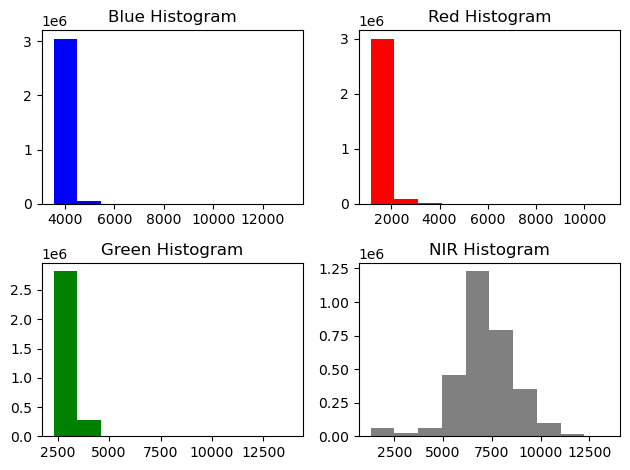

In [9]:
# Example
# Create two subplots and unpack the output array immediately
fig, (ax1, ax2) = plt.subplots(2, 2)

# Let's get our data
blue_data = blue[numpy.not_equal(blue, my_image.nodata)]
red_data = red[numpy.not_equal(red, my_image.nodata)]
green_data = green[numpy.not_equal(green, my_image.nodata)]
nir_data = nir[numpy.not_equal(nir, my_image.nodata)]

# Specify the .hist() function to create the hist
ax1[0].hist(blue_data, color='blue')
ax1[1].hist(red_data, color='red')
ax2[0].hist(green_data, color='green')
ax2[1].hist(nir_data, color='grey')

# Now add plot titles 
ax1[0].set_title('Blue Histogram')
ax1[1].set_title('Red Histogram')
ax2[0].set_title('Green Histogram')
ax2[1].set_title('NIR Histogram')

# This makes sure we have sufficient space between our plots
fig.tight_layout()

The thing to note here, is that we actually have the y-axis adjusting to maximize the available space. 

This means we have different y-axis ranges per histogram. 

Let's try implement a shared y axis, so they are all on the same scale and it's easier to make comparative differences.

We just need to add the `sharey=True` argument into the `plt.subplots()` function:


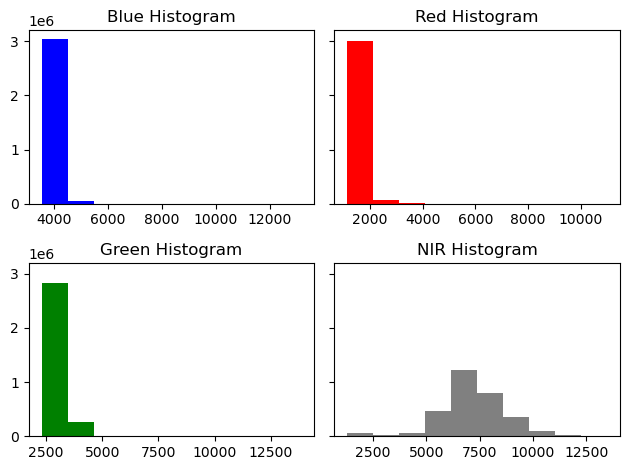

In [10]:
# Example
# Create two subplots and unpack the output array immediately
fig, (ax1, ax2) = plt.subplots(2, 2, sharey=True) #<- here is the difference as we state we want a shared axis

# Let's get our data
blue_data = blue[numpy.not_equal(blue, my_image.nodata)]
red_data = red[numpy.not_equal(red, my_image.nodata)]
green_data = green[numpy.not_equal(green, my_image.nodata)]
nir_data = nir[numpy.not_equal(nir, my_image.nodata)]

# Specify the .hist() function to create the hist
ax1[0].hist(blue_data, color='blue')
ax1[1].hist(red_data, color='red')
ax2[0].hist(green_data, color='green')
ax2[1].hist(nir_data, color='grey')

# Now add plot titles 
ax1[0].set_title('Blue Histogram')
ax1[1].set_title('Red Histogram')
ax2[0].set_title('Green Histogram')
ax2[1].set_title('NIR Histogram')

# This makes sure we have sufficient space between our plots
fig.tight_layout()

We have lots of functionality control over the `.hist()` function. 

Obviously, a histogram splits the data up into frequency bins. 

Thankfully, we have control over how many bins we desire. Let's try 50:

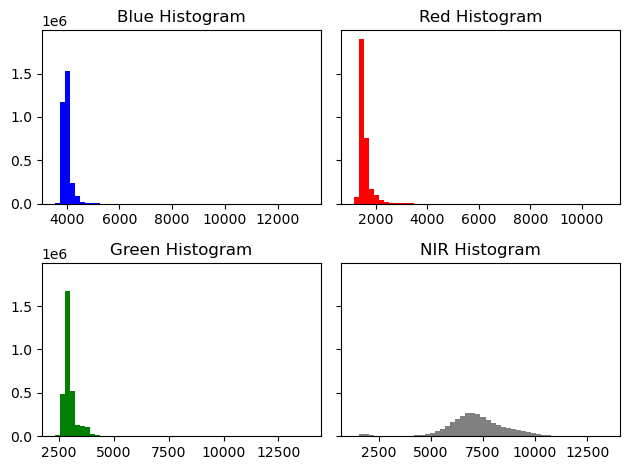

In [11]:
# Example
# Create two subplots and unpack the output array immediately
fig, (ax1, ax2) = plt.subplots(2, 2, sharey=True) #<- here is the difference as we state we want a shared axis

# Let's get our data
blue_data = blue[numpy.not_equal(blue, my_image.nodata)]
red_data = red[numpy.not_equal(red, my_image.nodata)]
green_data = green[numpy.not_equal(green, my_image.nodata)]
nir_data = nir[numpy.not_equal(nir, my_image.nodata)]

bin_number = 50
# Specify the .hist() function to create the hist
ax1[0].hist(blue_data, color='blue', bins=bin_number)
ax1[1].hist(red_data, color='red', bins=bin_number)
ax2[0].hist(green_data, color='green', bins=bin_number)
ax2[1].hist(nir_data, color='grey', bins=bin_number)

# Now add plot titles 
ax1[0].set_title('Blue Histogram')
ax1[1].set_title('Red Histogram')
ax2[0].set_title('Green Histogram')
ax2[1].set_title('NIR Histogram')

# This makes sure we have sufficient space between our plots
fig.tight_layout()

## Quick Task:

Explore the implications of changing the bin number and to see how it changes the shape of the histogram plots.


### Exporting our Histogram Plots

To export the panelplot graphs produced we can, use the `fig.savefig()` function.

We can apply this to our existing code, saving the image as a .png named 'histogram.png'.

You also have lots of functionality, including:
- dpi: The dots per square inch, which affects the quality.
- pad_inches: the amount of whitespace padding desired around the plot image. 

Let's see how we execute this function:

In [12]:
# Example
# Save the generated figure to an external image file
fig.savefig("histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

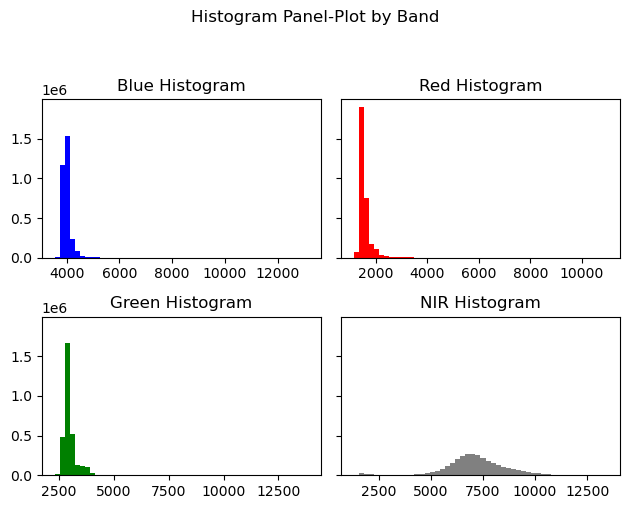

In [13]:
# Example
# Create two subplots and unpack the output array immediately
fig, (ax1, ax2) = plt.subplots(2, 2, sharey=True) #<- here is the difference as we state we want a shared axis

# Let's get our data
blue_data = blue[numpy.not_equal(blue, my_image.nodata)]
red_data = red[numpy.not_equal(red, my_image.nodata)]
green_data = green[numpy.not_equal(green, my_image.nodata)]
nir_data = nir[numpy.not_equal(nir, my_image.nodata)]

bin_number = 50
# Specify the .hist() function to create the hist
ax1[0].hist(blue_data, color='blue', bins=bin_number)
ax1[1].hist(red_data, color='red', bins=bin_number)
ax2[0].hist(green_data, color='green', bins=bin_number)
ax2[1].hist(nir_data, color='grey', bins=bin_number)

# Now add plot titles 
ax1[0].set_title('Blue Histogram')
ax1[1].set_title('Red Histogram')
ax2[0].set_title('Green Histogram')
ax2[1].set_title('NIR Histogram')

# Let's add an overall title to a plot
# The y argument moves the title higher, so we don't have overlapping text
plt.suptitle('Histogram Panel-Plot by Band', y=1.05)  

# This makes sure we have sufficient space between our plots
fig.tight_layout()

# Now export the final plot!
fig.savefig("histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.7)